In [1319]:
# !pip install pandas
# !pip install plotly
# !pip install matplotlib

In [1320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1 Import historical price data

Read in the data file

In [1321]:
df = pd.read_csv("sakura_data.csv")
col = list(df.columns)
# df.head()

Read Marriott and Hilton's data into different Data frame

In [1322]:
col_mar = col[:9]
col_hlt = col[-8:]
col_hlt.insert(0,"Date")
df_mar = pd.read_csv("sakura_data.csv",usecols=col_mar)
df_hlt = pd.read_csv("sakura_data.csv",usecols=col_hlt)
# print(df_mar.head())
# print(df_hlt.head())

## Step 2 Set parameters
x, threshold,alpha,interval

In [1323]:
x = 1
THRESHOLD = 2.5
alpha=0.05
interval=5

## Step 3 Calculate Spread, Standard Deviation of spread and Long Term Mean

In [1324]:
spread = np.log(df.mar_Close/df.hlt_Close**x)
# print(spread)
# print(type(spread))
window_size = 250
std_spread = pd.Series(spread[1:]).rolling(window_size).std(ddof=1)
std_spread = np.asarray(std_spread[window_size-1:-1])
# print(std_spread)
lt_mean_spread = pd.Series(spread[1:]).rolling(window_size).mean()
lt_mean_spread = np.asarray(lt_mean_spread[window_size-1:-1])
# print(lt_mean_spread)
# print(type(std_spread))
# lt_mean_spread

## Step 4 Calculate Entry Signal

In [1325]:
low = lt_mean_spread - THRESHOLD * std_spread
go_down = spread[:len(lt_mean_spread)] < low
high = lt_mean_spread + THRESHOLD * std_spread
go_up = spread[:len(lt_mean_spread)] > high
date = df_mar.Date[:len(lt_mean_spread)]
hlt_Open = df_hlt.hlt_Open[:len(lt_mean_spread)]
mar_Open = df_mar.mar_Open[:len(lt_mean_spread)]

mydf = pd.DataFrame(data = date)
mydf['Low'] = go_down
mydf['High'] = go_up
mydf['hlt_Open'] = hlt_Open
mydf['mar_Open'] = mar_Open
mydf = mydf.reset_index()  # make sure indexes pair with number of rows


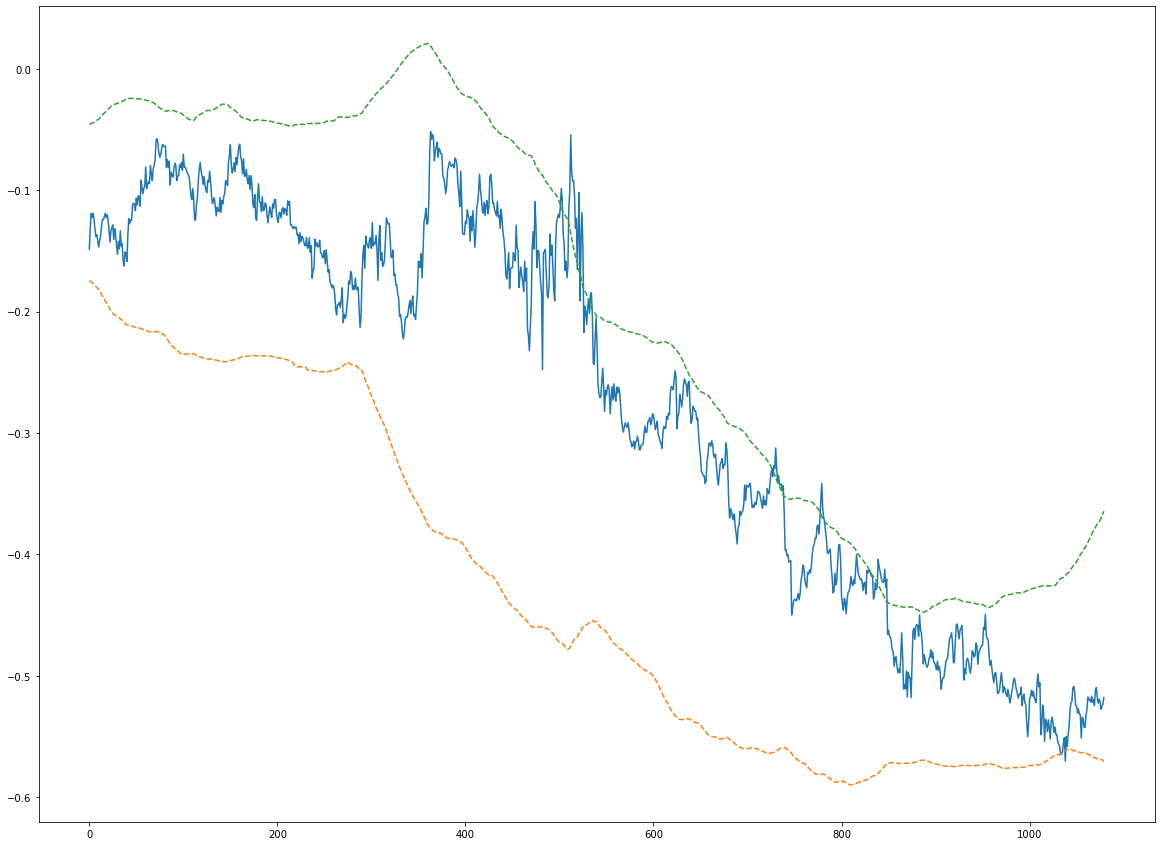

In [1326]:
plt.figure(figsize=(20,15))
plt.plot(spread[:len(lt_mean_spread)])
plt.plot(low, linestyle='--')
plt.plot(high,linestyle='--')

## Step 5 Output as a Blotter
Reference: <a href="https://pypi.org/project/QTPyLib/" target="_blank">QTPyLib 1.5.83</a>.

In [1327]:
# !pip install blotter

In [1328]:
blotter = pd.DataFrame(
    columns=['date', 'trip', 'action', 'ticker', 'size',
             'price', 'status']
)
for index, row in mydf.iterrows():
    if row["Low"] == True:
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'BUY', 'MAR', 1, row["mar_Open"], 'FILLED']
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'SELL', 'HLT', 1, row["hlt_Open"], 'FILLED']
    elif row["High"] == True:
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'SELL', 'MAR', 1, row["mar_Open"], 'FILLED']
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'BUY', 'HLT', 1, row["hlt_Open"], 'FILLED']


In [1329]:
blotter = pd.DataFrame(
    columns=['date', 'trip', 'action', 'ticker', 'size',
             'price', 'status']
)
for index, row in mydf.iterrows():
    if row["Low"] == True:
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'BUY', 'MAR', 1, row["mar_Open"], 'FILLED']
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'SELL', 'HLT', 1, row["hlt_Open"], 'FILLED']
    elif row["High"] == True:
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'SELL', 'MAR', 1, row["mar_Open"], 'FILLED']
        blotter.loc[len(blotter.index)] = [row["Date"], 'Open', 'BUY', 'HLT', 1, row["hlt_Open"], 'FILLED']


In [1330]:
blotter

,date,trip,action,ticker,size,price,status
0,2020-04-20,Open,SELL,MAR,1,73.5000,FILLED
1,2020-04-20,Open,BUY,HLT,1,81.6100,FILLED
2,2020-04-17,Open,SELL,MAR,1,74.6700,FILLED
3,2020-04-17,Open,BUY,HLT,1,85.2952,FILLED
4,2020-04-07,Open,SELL,MAR,1,70.1800,FILLED
5,2020-04-07,Open,BUY,HLT,1,78.3050,FILLED
6,2020-04-06,Open,SELL,MAR,1,60.8700,FILLED
7,2020-04-06,Open,BUY,HLT,1,64.5500,FILLED
8,2020-04-03,Open,SELL,MAR,1,58.0000,FILLED
9,2020-04-03,Open,BUY,HLT,1,64.3600,FILLED


# Step 6 Calculate Exit Signal

In [1331]:
def get_exit_orders(entry_blotter,interval,alpha):
 

    exit_list = []
    forced_list=[]
    for i in range(0, len(entry_blotter), 2):
        
        entry_date = entry_blotter['date'][i]
        entry_price_mar = entry_blotter.iloc[i]["price"]
        entry_price_hlt = entry_blotter.iloc[i + 1]["price"]
        entry_stock_a = entry_blotter.iloc[i]['ticker']
        entry_stock_b = entry_blotter.iloc[i + 1]['ticker']
        entry_action_a = entry_blotter.iloc[i]['action']
        exit_action_a = 'BUY' 
        entry_action_b = entry_blotter.iloc[i+1]['action']
        exit_action_b = 'SELL'
        exit_price_a = entry_price_mar * (1 + alpha)
        exit_price_b= entry_price_hlt * (1 + alpha)
        
        
        for days in range(1,interval):
            new_d=datetime.strftime(datetime.strptime(blotter['date'][i], '%Y-%m-%d')+BDay(days),'%Y-%m-%d')
            #print(new_d)
            if((df_mar[df_mar["Date"]==new_d]).empty==False):
                if(exit_price_a<=df_mar[df_mar["Date"]==new_d]['mar_High'].values[0] and exit_price_b<=df_hlt[df_hlt["Date"]==new_d]['hlt_High'].values[0]):
                    exit_list.append([new_d, "Closed", exit_action_a, "MAR",1, exit_price_a, "FILLED"])
                    exit_list.append([new_d, "Closed", exit_action_b, "HLT",1, exit_price_b, "FILLED"])
                    
                    break
        if((df_mar[df_mar["Date"]==new_d]).empty==False):
                if(exit_price_a<=df_mar[df_mar["Date"]==new_d]['mar_High'].values[0] and exit_price_b<=df_hlt[df_hlt["Date"]==new_d]['hlt_High'].values[0]):
                    a=1#pass
                else:
                    exit_list.append([new_d, "Closed", exit_action_a, "MAR",1, exit_price_a, "CANCELD"])
                    exit_list.append([new_d, "Closed", exit_action_b, "HLT",1, exit_price_b, "CANCELD"])
                    plus1_date=datetime.strftime(datetime.strptime(new_d, '%Y-%m-%d')+BDay(days),'%Y-%m-%d')
                    forced_list.append([plus1_date, "Closed", exit_action_a, "MAR",1, exit_price_a, "Forced"])
                    forced_list.append([plus1_date, "Closed", exit_action_b, "HLT",1, exit_price_b, "Forced"])
                
                      
                   
    exit_blotter = pd.DataFrame(exit_list,columns=[ "date", "trip", "action", "ticker", "size", "price", "status"])
    forced=pd.DataFrame(forced_list,columns=[ "date", "trip", "action", "ticker", "size", "price", "status"])
    return exit_blotter ,forced

complete_blotter = pd.concat([blotter, get_exit_orders(blotter,5,0.01)[0]])
 
       
        

# Exit Blotter

In [1332]:
get_exit_orders(blotter,5,0.01)[0]

,date,trip,action,ticker,size,price,status
0,2020-04-24,Closed,BUY,MAR,1,74.235000,CANCELD
1,2020-04-24,Closed,SELL,HLT,1,82.426100,CANCELD
2,2020-04-23,Closed,BUY,MAR,1,75.416700,CANCELD
3,2020-04-23,Closed,SELL,HLT,1,86.148152,CANCELD
4,2020-04-09,Closed,BUY,MAR,1,70.881800,FILLED
5,2020-04-09,Closed,SELL,HLT,1,79.088050,FILLED
6,2020-04-07,Closed,BUY,MAR,1,61.478700,FILLED
7,2020-04-07,Closed,SELL,HLT,1,65.195500,FILLED
8,2020-04-06,Closed,BUY,MAR,1,58.580000,FILLED
9,2020-04-06,Closed,SELL,HLT,1,65.003600,FILLED


# Result Blotter 

In [1333]:
complete_blotter.sort_index(ascending=True, inplace=True) 
complete_blotter

,date,trip,action,ticker,size,price,status
0,2020-04-20,Open,SELL,MAR,1,73.500000,FILLED
0,2020-04-24,Closed,BUY,MAR,1,74.235000,CANCELD
1,2020-04-20,Open,BUY,HLT,1,81.610000,FILLED
1,2020-04-24,Closed,SELL,HLT,1,82.426100,CANCELD
2,2020-04-17,Open,SELL,MAR,1,74.670000,FILLED
2,2020-04-23,Closed,BUY,MAR,1,75.416700,CANCELD
3,2020-04-17,Open,BUY,HLT,1,85.295200,FILLED
3,2020-04-23,Closed,SELL,HLT,1,86.148152,CANCELD
4,2020-04-07,Open,SELL,MAR,1,70.180000,FILLED
4,2020-04-09,Closed,BUY,MAR,1,70.881800,FILLED


# Forced - all canceld order will be forced to sell at market price the next trading day

In [1334]:
get_exit_orders(blotter,5,0.01)[1]

,date,trip,action,ticker,size,price,status
0,2020-04-30,Closed,BUY,MAR,1,74.235000,Forced
1,2020-04-30,Closed,SELL,HLT,1,82.426100,Forced
2,2020-04-29,Closed,BUY,MAR,1,75.416700,Forced
3,2020-04-29,Closed,SELL,HLT,1,86.148152,Forced
4,2020-04-10,Closed,BUY,MAR,1,69.437500,Forced
5,2020-04-10,Closed,SELL,HLT,1,75.729800,Forced
6,2020-04-08,Closed,BUY,MAR,1,69.690000,Forced
7,2020-04-08,Closed,SELL,HLT,1,79.487000,Forced
8,2020-04-07,Closed,BUY,MAR,1,76.356000,Forced
9,2020-04-07,Closed,SELL,HLT,1,88.476000,Forced
